# Assignment 2: Practical Machine Learning Project
**<h3>Fraud detecion in banking buseness with multi-criteria decision making framework - A combination of Backpropagation and NSGA-II</h3>**

Student Name | Student ID 
---|---
Liang Ou |  13060835 
Guanhua Zeng| 12992677

Github link: https://github.com/ouliang0128/machine_learning_assignment2

# Abstract
Since a variety of digital transaction approaches be popular in daily life, the probability of transaction data fraud raises in the information era which leads billions of dollars of the USA to be lost. However, traditional fraud detection ways are not more suitable for the growing amount of data. For detecting the fraud data quicker and reliable, machine learning technology is applied. Although previous literature had made a great contribution to the fraud detection area by machine learning technology, there are still some limitations to their researches. The one most important issue is about multiple-criteria decision making because the facticity of the predicted result can not only be determined by accuracy, which will be solved in this report. This paper will describe how the authors mix the artificial neural network with the non-dominating sorting genetic algorithm-II (NSGA-II) to build an MCDM framework to achieve fraud detection in the credit card data which is anonymous and provided from Kaggle and shows the tested result of the framework.

**Keywords**: Machine learning, Neural network, Genetic Algorithm, MCDM and optimize

# 1.Introduction

Since the bank provides diversified online bank applications like the telephone bank, online bank and mobile bank (Guo et al. 2018) to customers, the customers not only enjoy such convenient banking services but also suffer the potential risk of credit card fraud. The only way to protect the security of the customers ' credit card is to use the PIN(password) for identification. But actually, many users would like to set up the password-free payment for low-value transactions, because it is really hard for users to remember every password of every credit cards. In 2014, from Mastercard company's survey(Kim et al. 2019) which is about the loss caused by fraud transactions or phishing, more than 118 billion dollars are stolen from customers in the USA. Therefore, it is significant to detect online or offline fraud data in the banking business.

Before the data mining technology is popular, the data auditor used to detect fraud data by the traditional methods like the manual audition with data visualization tools(Turban, Sharda & Delen 2010), which is time-consuming and useless to online transactions (West & Bhattacharya 2016, p. 47).  For implementing automatical and accurate fraud data detection,  one of the successful models is achieved with the neural network and t-statistic algorithm by Ravisankar et al. (2011). However, it only focused on raising the accuracy for detecting fraud data and overlooked the imbalanced data issue. The imbalanced data issue means that the fraud data only occupy a tiny fraction of the total data set, so it doesn't make sense to judge a model by the accuracy which mostly calculated by predicting the true value as positive. Therefore, the model should be judged and trained by multi-criteria such as accuracy and AUC which is marked by the false-positive results. To achieve multi-objective optimization and decrease the computational complexity of the neural network, NSGA-II is introduced, which is one of the best multi-objective optimizations (Yusoff, Ngadiman & Zain 2011).

For resolving the limitation of existing methodology, this report introduces an elementary multi-criteria decision-making framework that combines the back-propagation and NSGA-II optimization to train the classifier-neural network. In section 2, the main challenges of this research will be introduced and the data structure will also be analyzed. Besides, this section will talk about the idea of building and testing the framework. In section 3, the structure of the MCDM framework will be drawn and described in detail. Also, the back-propagation and NSGA-II will be introduced in particular. What's more, the implemented algorithm and results of this framework is shown in the 3.3 section. The next section is about the evaluation using the whole data set to test and compare the models which are the original neural network and MCDM model. Before the last section, the conclusion part will summarize this report and provide the direction of future research about the optimization. Last but not least, the ethical issues of this research will be explored and discussed by the characteristics of the technology used, referenced or implemented in this research.

##1.1. Research Aims and Objectives 
This research aims to establish a framework that combines the neural network and NSGA-II algorithm to achieve data prediction through multi-criteria decision making. This framework is a scalable framework, which means it is available for further researchers to edit and add any fitness functions into training. With this automatic model, on the one hand, the fraud credit card transactions can be identified quickly and intelligently. On the other hand, the property of the credit card owner will be protected by this model when someone illegally uses their credit card.

# 2. Exploration

In this section, the report will discuss the main challenges for the topic, and data model to address these challenges. Then, the test plan will be explained.

## 2.1 Challenges
The main challenges of detecting fraud in the banking business are class imbalance as discussed previously. To address this challenge, we use the "re-sampling" technique to enlarge the number of fraud records. Furthermore, the class imbalance issue leads to another issue of the ineffective of single evaluation criteria, i.e. the accuracy of the model. Thus, the idea of multi-criteria decision making has emerged as explained previously. 
As Abbass (2003) explained, the computational cost of backpropagation is too much for large neural networks. Along with its ineffective for dealing with multi-objective problems, a backpropagation optimization method is incompetent for fraud detection. Therefore, this paper combines it with NSGA-II to improve the optimization process of the neural network.

## 2.2 Data Structure
The dataset is originally downloaded from kaggle.com to a google drive. Then it is extracted by the following code. 
We can see from the following execution result that the fraud data only consist of 0.17% of the whole dataset.

In [0]:
# First dataset is downloaded from my google drive. 
# This is because the csv file contains 

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link='https://drive.google.com/open?id=1yLYqckWXpxzUe6_IXNlKVKsiNC4_k2KN'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('creditcardfraud.csv')  
df = pd.read_csv('creditcardfraud.csv')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

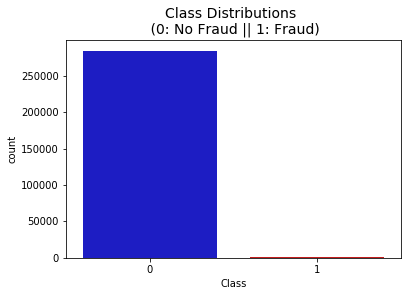

In [21]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fig. 1. Imbalance Distribution of Class Values

Fig.2 shows the correlation between each pair of attributes. The darker a block is, the stranger the negative correlation

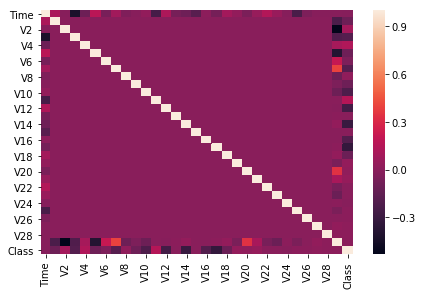

In [22]:
correlated_data = df.corr()
plt.figure(figsize=(7,4.5))
sns.heatmap(correlated_data, annot=False)

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fig. 2. Correlations Matrix if the dataset 



## 2.3 Plan for Data Model
To combine the two optimizing algorithms, the data model this paper introduced plans to run NN with ]backpropagation first. Then the accuracies and AUCs of different parameters are calculated as the input of NSGA-II. NSGA-II use this information from backpropagation to conduct further optimization. This optimization utilizes only a small part of the dataset, and finally, the performance of the model is evaluated on the whole dataset.   
For simplexity, the design of our model only includes 2 criterion, which is accuracy and AUC, and their weights for evaluation are the same. 

## 2.4 Plan for Tests

As described previously, the test of the model this paper introduced is applied to the whole dataset. This paper plans to compare the performances of the model before NSGA-II and after NSGA-II. This result will be shown in section 4.

# 3. Methodology

<p align="left">As the Fig. 3 shown, firstly, the data will be re-sampled to be balanced data samples, because in the data set the number of fraud data and truth data is extremely unbalanced. Besides, the training data and test data will be extracted from the re-sampled data set. Secondly, N neural networks will be initialized with the training data and trained with the back-propagation algorithm for getting the original solutions(weight and bias) for the prediction. Thirdly, the framework will pass the solutions to the NSGA-II process for achieving multi-objectives optimization. Fourthly, the solutions will be sorted by multi-objective sorting rules so that they can be applied in the crossover process. Fifthly, crossover processing will generate N child solutions from their parent solutions. Sixthly, the mutation will happen in N child solutions for getting more possible solutions. Seventhly, with N child solutions and N original parent solutions, in this part, there will be N best solutions evaluated and selected by the multi-objective sorting algorithm. Last, the framework will check whether the process comes to the last iteration. If the current iteration isn’t the last round, the process will back to the third step - NSGA-II processing.</p>
<center><img src="https://github.com/geroboog/machineLearning/blob/master/a2_workflow.JPG?raw=true" width=300 hspace="5" vspace="5" /></center><center><p>Fig. 3 The MCDM framework basing on NSGA-II algorithm and neural network</p></center>

## 3.1 Backpropogation
The mechanism of backpropagation is adjusting each of the weights by "error signal", which is defined by

$δ_{pj}= f'_j (net_pj)∑_kδ_{pk} w_{kj} $ 

Minsky and Papert (1969)

In this formula, $δ_{pj}$ is the error signal of one perceptron, which is calculated by multiplying its derivative of activation function with respect to its net input $f'_j (net_pj)$ and  of the weighted sum of error signals from its output perceptrons.
In this mechanism, the error signals, computed by the output of the network and the target value, is the only factor for optimizaing the network. Thus, it is incapable for dealing with multi-objective problem, in which error is only one factor.


## 3.2 Non-dominating Sorting Genetic algorithm-II (NSGA-II)
To achieve multi-objective optimization and reduce the computational complexity of neural network, NSGA-II is introduced. NSGA-II is one of the best  multi objective optimizations (MoGAs) with fast sorting and elite multi objective genetic algorithm features (Yusoff, Ngadiman & Zain 2011). Its fast sorting technique can efficently calculate elements in muliple layers of Pareto fronts for GA operations. Those elements are then used as parents for generating offsprings by Genetic Algorithms (GAs). GAs are stochastic optimization algorithm which aim at keeping the features of old solutions by "crossover" them and generating new fefatures by "mutate" their offsprings. The crossover operation is defined as the following equation:

$
s^{j}_{new}=
\begin{Bmatrix}
 \gamma_1s^{j}_{parent_1}+(1-\gamma_1)s^{j}_{parent_2}, j=1,...t\\
 \gamma_2s^{j}_{parent_1}+(1-\gamma_2)s^{j}_{parent_2},j=t+1,...D
 \end{Bmatrix}
$

In this equation, $s^{j}_{new}$ is the $j^{th}$ component of the new sulution, $\gamma_1$ and $\gamma_2$ are two random values in a range of [0,1]. $s^{j}_{parent_1}$ and $s^{j}_{parent_2}$ are the $j^{th}$ components of its two parent solutions. The mutation operation is simple in our design, for which only one fator is multiplied with the relevant component of s, as it shows in the following equation:
$
s^{j}= \gamma_3s^{j}
$



As a result, NSGA-II is much faster and competent for dealing with multi-objective problems the backpropagation, although backpropagation is more accurate than NSGA-II. 

## 3.3 Implement Algorithms
In this section, excutable algorithm is displayed step by step. The original python code and dataset can be acccessed on github, with URL of "https://github.com/ouliang0128/machine_learning_assignment2". For the back propagation optimized NN, this research applies the NN struture provided by "sklearn" package. For the NSGA-II optimazition algorithm, we designed it upon haris989's design, the URL of his/her gitbub is "https://github.com/haris989/NSGA-II". 

In [23]:
# After import the dataset, we can see that it contains 31 columns, among which 
# the first 30 columns are attributes and the last columns are target 'Class'.
print(df.head(5))

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [0]:
# required packages and some parameters of our model is defined as following:    
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import math
import random

_SwarmSize=50       # _SwarmSize defines the number of solutions for NSGA-II 
                    #algorithm, it also aligned with the number of 
max_gen = 100       # max_gen defines the max iteration for NSGA-II Loop
gen_no=0            # gen_no=0 initilized the iteration number for NSGA-II Loop
RAND_MAX = 32767    # RAND_MAX is the random seed


In [25]:
# After all initial imports and parameter definations, dataset is proprecessed 
def preprocessing (df):
    count_class_0, count_class_1 = df.Class.value_counts() 
    # over sampling to overcome class imbalance problem, '0's represent normal 
    # transaction, '1's represent fraud transactions
    df_class_0 = df[df['Class'] == 0]
    df_class_1 = df[df['Class'] == 1]
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
       
    # because the original dataset is to large, we only chose 20,000 records of
    # out more thant 50 thousands total records
    df_test_over=df_test_over.sample(n=20000)
    
    # because other preprocessing process is already done, such as normalization
    # and interaction, PCA, we directly split the dataset into features,"X", 
    # and traget,"y".
    x = df_test_over.drop('Class',1)
    y = df_test_over.Class.astype('category',copy=False)
    return x,y
X,y = preprocessing(df)
print('Original dataset has shape like: ',df.shape)
print('Features of the dataset have shape like: ',X.shape)
print('Target class has shape like: ',y.shape)


Original dataset has shape like:  (284807, 31)
Features of the dataset have shape like:  (20000, 30)
Target class has shape like:  (20000,)


In [0]:
# we split data into 80% training_set and 20% testing_set, them trainingset is 
# use for k-fold cross_validation, where k=_SwarmSize=50
xf_train, xf_valid, yf_train, yf_valid= train_test_split(X,y,random_state=42, 
                                                         test_size=0.2)
mlpi=MLPClassifier()
cv = KFold(n_splits=_SwarmSize, random_state=42, shuffle=False)

In [0]:
# Then we initiately train 50 models with backpropagation optimized neural network. 
# After tainning, parameters (weights and bias) and their fitness values (Accuracy 
# scores and AUC scores) are collected
# Those parameters are used for NSGA-II sorting and optimizing.

def get_para(model):
# function for extract parameters from model
    para = []
    for j in range(len(model.coefs_)):
        for k in range(len((model.coefs_[j]))):
            # if len((model.coefs_[j]))==1:
            #     coeff.append((model.coefs_[j]))
            for l in range((len(model.coefs_[j][k]))):
                para.append(model.coefs_[j][k][l])
    for j in range (len(model.intercepts_)):
        for k in range(len((model.intercepts_[j]))):
            para.append(model.intercepts_[j][k])
    return para
mlp=[]
f1=[]
f2=[]
for train_index, test_index in cv.split(xf_train):
    # cross validation
    X_train, X_test, y_train, y_test = xf_train.iloc[train_index], \
    xf_train.iloc[test_index], yf_train.iloc[train_index], \
    yf_train.iloc[test_index]
    mlpi=MLPClassifier(hidden_layer_sizes=(X.shape[1],10,10,10,10,10,5,2),max_iter=100)
    mlpi.fit(X_train,y_train)
    predi=mlpi.predict(xf_valid)
    accuracyi=accuracy_score(yf_valid, predi)
    roci=roc_auc_score(yf_valid, predi)
    f1.append(accuracyi)
    f2.append(roci)
    parai=get_para(mlpi)
    mlp.append(np.asarray(parai))

In [0]:
# Look at how the initalized models perform


def draw_roc(y_test,preds):
# function for drawing the ROC curve
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
def set_para(model,solution):
# function for sending parameters to NN model 
    count = 0
    for j in range(len(model.coefs_)):
        for k in range((len(model.coefs_[j]))):
            for l in range((len(model.coefs_[j][k]))):
                model.coefs_[j][k][l] = solution[count]
                count += 1
    for j in range(len(model.intercepts_)):
        for k in range((len(model.intercepts_[j]))):
            model.intercepts_[j][k] = solution[count]
            count += 1   

In [29]:
f1_np=np.asarray(f1)
f2_np=np.asarray(f2)

# print("Before GA, accuracies for models are: ",1-f1_np)
print("the best accuracy is: ",f1_np.max())


bestind=f1_np.argmax()
# print("Before GA, AUC for models are,",1-f2_np)
print("the most accurate one's AUC is: ",f2_np[bestind])

set_para(mlpi,mlp[bestind])
yp_test=mlpi.predict(xf_valid)
cm=confusion_matrix(yf_valid, yp_test)
print("The confusion_matrix of the most accurate one before GA is :")
print(cm)

the best accuracy is:  0.902
the most accurate one's AUC is:  0.9019712254928064
The confusion_matrix of the most accurate one before GA is :
[[1688  311]
 [  81 1920]]


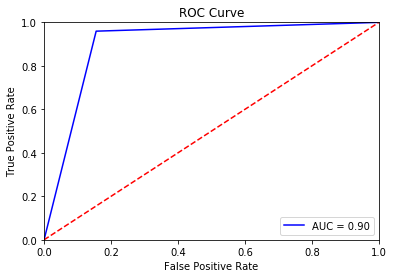

In [30]:
draw_roc(yf_valid,yp_test)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fig. 4. ROC Curve for the model parameter after crossvalidation

In [0]:
# Prepare for NSGA_II loop
# give NSGA the parameters extracted from initial networks
solution=mlp[:]
# set population size = number of solutions
pop_size=len(solution)
# the first objective is accuracy of the model
function1_values = [f1[i] for i in range (len(f1))]
# the second objective is the AUC score of the model
function2_values = [f2[i] for i in range (len(f2))]       

In [0]:
# This part is the definations of all methods need for NSGA-II
# random value generato
def randn(nmin, nmax):
    thisRand = ((random.randint(0, RAND_MAX) / (RAND_MAX + 1.0))) * \
    (nmax - nmin) + nmin;
    return thisRand

# find the index of value "a" in a list
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

#Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))

        values[index_of(min(values),values)] = math.inf
    return sorted_list

#Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or \
            (values1[p] >= values1[q] and values2[p] > values2[q]) or \
            (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or \
            (values1[q] >= values1[p] and values2[q] > values2[p]) or \
            (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

#Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - \
                                    values2[sorted1[k-1]])/ \
        (max(values1)-min(values1)+0.00000001)
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - \
                                    values2[sorted2[k-1]])/ \
        (max(values2)-min(values2)+0.00000001)
    return distance

#Function to carry out the crossover
def crossover(a,b):
    child1=np.zeros([len(a)])
    child2=np.zeros([len(a)])
    gama1=randn(0,1)
    gama2 = randn(0, 1)
    #chose the position for applying parents chromes
    pos_sep=random.randint(1,len(a)-1) 
    for i in range (pos_sep):
        child1[i] = gama1 * a[i] + (1 - gama1) * b[i]
        child2[i] = gama1 * b[i] + (1 - gama1) * a[i]
    for i in range (pos_sep,len(a)):
        child1[i] = gama2 * a[i] + (1 - gama2) * b[i]
        child2[i] = gama2 * b[i] + (1 - gama2) * a[i]
    return child1

#Function to carry out the mutation operator, mutaion rate is set to 5%
def mutation(solution):
    for i in range (len(solution)):
        if randn(0, 1)<0.05:
            solution[i]=randn(0, 1)*solution[i]
    return solution


In [0]:
# The main loop for NSGA-II optimization
while(gen_no<max_gen): # run 100 times
    # get indeces for non-dominated solutions 
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:],
                                                            function2_values[:])
    # calculating crowding distances for choing front
    crowding_distance_values=[]
    for i in range(0,len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:], 
                                                          function2_values[:],                                                          
                                          non_dominated_sorted_solution[i][:]))
        
    # construct new population
    solution2 = solution[:] # first half of the new population is set as previous ones.
    
    #Generating offsprings
    while(len(solution2)!=2*pop_size):
        a1 = random.randint(0,pop_size-1)    # chose parents for crossover
        b1 = random.randint(0,pop_size-1)
        if randn(0,1)>0.5:
            solution2.append(crossover(solution[a1],solution[b1]))
    # mutate offsprings
    for i in range (pop_size,len(solution2)):
        solution2[i]=mutation(solution2[i])

    # initiate new fitness values
    function1_values2=[]
    function2_values2=[]
    # evaluation children
    for i in range(len(solution2)):
        set_para(mlpi,solution2[i])
        y_pred1=mlpi.predict(xf_valid)
        function1_values2.append(accuracy_score(yf_valid, y_pred1))
        function2_values2.append(roc_auc_score(yf_valid, y_pred1))

    # Sorting children...
    non_dominated_sorted_solution2 = fast_non_dominated_sort \
    (function1_values2[:],function2_values2[:]) 
    crowding_distance_values2=[]
    for i in range(0,len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance \
                                         (function1_values2[:], \
                                          function2_values2[:], \
                          non_dominated_sorted_solution2[i][:]))
    new_solution= []
    for i in range(0,len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = \
        [index_of(non_dominated_sorted_solution2[i][j], \
                  non_dominated_sorted_solution2[i] ) \
         for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], \
                                 crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]]  
                 for j in range(0,len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if(len(new_solution)==pop_size):
                break
        if (len(new_solution) == pop_size):
            break
    # solution is overwriten for the next iteration 
    solution = [solution2[i] for i in new_solution]
    # update fitness values
    function1_values=[]
    function2_values=[]
    for i in range (pop_size):
        set_para(mlpi,solution[i])
        y_pred2=mlpi.predict(xf_valid)
        function1_values.append(accuracy_score(yf_valid, y_pred2))
        function2_values.append(roc_auc_score(yf_valid, y_pred2))
    gen_no = gen_no + 1

In [34]:
# We can now look at the final fitness valules and confusion matrix after NSGA-II
print("visualize")
function1 = [i  for i in function1_values]
function2 = [j  for j in function2_values]
f=np.asarray(function1)+np.asarray(function2)
best_ind=f.argmax()
set_para(mlpi,solution[best_ind])
yf_pred=mlpi.predict(xf_valid)
cm2=confusion_matrix(yf_valid, yf_pred)
print("The confusion_matrix for the best ANNClassifier is :")
print(cm2)
print("After GA, the best accuracy is: ",function1[best_ind])
print("After GA, the best AUC is: ",function2[best_ind])

visualize
The confusion_matrix for the best ANNClassifier is :
[[1979   20]
 [ 284 1717]]
After GA, the best accuracy is:  0.924
After GA, the best AUC is:  0.9240329810082453


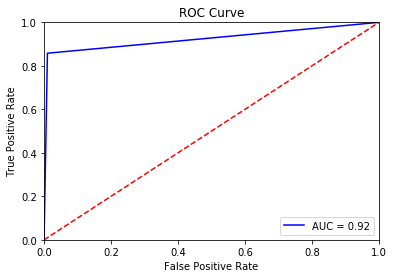

In [35]:
draw_roc(yf_valid,yf_pred)

### &nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fig. 5. ROC Curve for the model parameters after NSGA-II

# 4. Evaluation

Now we can evaluate our two models, the one before NSGA-II, and the one after NSGA-II on the original dataset 

In [38]:
Features=df.drop('Class',1)
Target=df.Class.astype('category',copy=False)
set_para(mlpi,mlp[bestind])
y_pred=mlpi.predict(Features)
cm=confusion_matrix(Target, y_pred)
print("Without NSGA-II optimization, model's CM is: ")
print(cm)
print("Without NSGA-II optimization accuracy is: ",accuracy_score(Target, y_pred))
print("Without NSGA-II optimization AUC is: ",roc_auc_score(Target, y_pred))

Without NSGA-II optimization, model's CM is: 
[[236771  47544]
 [    19    473]]
Without NSGA-II optimization accuracy is:  0.8329991889244295
Without NSGA-II optimization AUC is:  0.897079569651719


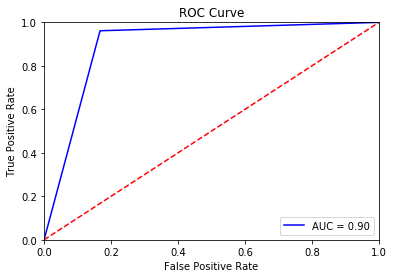

In [39]:
draw_roc(Target,y_pred)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fig. 6. ROC Curve for validation of the parameter before NSGA-II

In [40]:
set_para(mlpi,solution[best_ind])
y_pred=mlpi.predict(Features)
cm=confusion_matrix(Target, y_pred)
print("The NSGA optimized model's CM is: ")
print(cm)
print("The NSGA optimized accuracy is: ",accuracy_score(Target, y_pred))
print("The NSGA optimized AUC is: ",roc_auc_score(Target, y_pred))

The NSGA optimized model's CM is: 
[[280488   3827]
 [    69    423]]
The NSGA optimized accuracy is:  0.986320560941269
The NSGA optimized AUC is:  0.9231478375710899


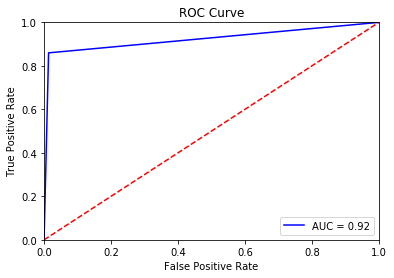

In [41]:
draw_roc(Target,y_pred)

&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fig. 7. ROC Curve for validation of the parameter after NSGA-II

By comparing the resutlt from Fig.6 and Fig.7, there is a tradeoff between two fitness. Although the accuracy looks very hight for the backpropagation optimized neural network, its AUC is comparatively low than the model trained in addition with NSGA-II. 



# 5. Conclusion
For achieving multi-objective optimization to address the class imbalance issue for fraud detection in the banking business and reduce time complexity for model training, this paper introduces a new neural network model, which combines backpropagation and NSGA-II optimization algorithms. Although there the test of the model shows there is a tradeoff between accuracy and AUC, the improvement of the new model for efficiency and effectiveness are neglectable. Because of the time limitation, this research has not explored many other possible designs for the models. For example, solutions after NSGA-II can further send to backpropagation for further training. Besides, objective functions can include other criteria, such as originality of record. These explorations can be done in the future.

#6. Research Ethics

In fraud detection research, the researcher should protect the privacy of the data owners and never reveal the data. But the data set used in this paper is provided from the Kaggle which is a public web site and all data and attributes of the data set are anonymously recorded. So it is impossible for people to extra information about specific data owners or credit cards from the data set. Besides, this research uses open sources including Python programming language, Sklearn library, and the NSGA-II from Github to implement the framework, so there are no copyright issues in this research. What's more, this research is for resolving one of the data crime issues, so even users may misuse this technology, it would not cause any illegal issues. However, if companies use this technology for business, they have to understand that this technology is still in a preliminary stage and it may predict the data in a wrong way which will cause the complaints of customers. For example, if the real user is using his or her credit card to online shopping and the model predicts the transaction is fraud, then he or she may not be able to purchase any goods at that moment. Therefore, the authors suggest this technology should be used for academic only at the current stage and improved in future studies.

# References
[1]Guo, C., Wang, H., Dai, H.-N., Cheng, S. & Wang, T. 2018, 'Fraud Risk Monitoring System for E-Banking Transactions', 2018 IEEE 16th Intl Conf on Dependable, Autonomic and Secure Computing, IEEE, pp. 100-105.

[2]Kim, E., Lee, J., Shin, H., Yang, H., Cho, S., Nam, S.K., Song, Y., Yoon, J.A. & Kim, J.I. 2019, 'Champion-challenger analysis for credit card fraud detection: Hybrid ensemble and deep learning', Expert Systems with Applications, vol. 128, pp. 214-224.

[3]Turban, E., Sharda, R. & Delen, D. 2010, Decision Support and Business Intelligence Systems, Ninth edn, Prentice Hall Press.

[4]West, J. & Bhattacharya, M. 2016, 'Intelligent financial fraud detection: a comprehensive review', Computers & security, vol. 57, pp. 47-66.

[5]Ravisankar, P., Ravi, V., Rao, G.R. & Bose, I. 2011, 'Detection of financial statement fraud and feature selection using data mining techniques', Decision Support Systems, vol. 50, no. 2, pp. 491-500.

[6]Abbass, H.A. 2003, 'Speeding Up Backpropagation Using Multiobjective Evolutionary Algorithms', *Neural Computation*, vol. 15, no. 11, pp. 2705-26.

[7]Yusoff, Y., Ngadiman, M.S. & Zain, A.M. 2011, 'Overview of NSGA-II for Optimizing Machining Process Parameters', *Procedia Engineering*, vol. 15, pp. 3978-83.